<a href="https://colab.research.google.com/github/juliandavidolaya/Entregable-3/blob/main/Copia_de_NFL_Health_%26_Safety_Helmet_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# descripción literal del dataset.#

En esta competición, se te asigna la tarea de asignar al jugador correcto en imágenes de juego. Cada jugada tiene dos videos asociados, mostrando una vista de la línea lateral y otra de la línea final, y los videos están alineados para que los fotogramas correspondan entre los videos. Los videos del conjunto de entrenamiento se encuentran en train/ con etiquetas correspondientes en train_labels.csv, mientras que los videos para los cuales debes hacer predicciones están en la carpeta test/.

Para ayudar con la detección de cascos, también se proporciona un conjunto de datos auxiliares de imágenes que muestran cascos con cuadros delimitadores etiquetados. Estos archivos se encuentran en images/ y los cuadros delimitadores en image_labels.csv.

Este año también proporcionamos cuadros de detección de cascos de referencia para el conjunto de entrenamiento y prueba. train_baseline_helmets.csv es la salida de un modelo de detección de cascos de referencia que fue entrenado en las imágenes y etiquetas de la carpeta de imágenes.

train_player_tracking.csv proporciona datos de seguimiento a 10 Hz para cada jugador en el campo durante las jugadas proporcionadas.

Esta es una competición de código. Cuando envíes tu modelo, se volverá a ejecutar en un conjunto de 15 jugadas no vistas ubicadas en un conjunto de prueba de retención. Los videos de prueba proporcionados públicamente son simplemente un conjunto de jugadas simuladas (copiadas del conjunto de entrenamiento) que no se utilizan en la puntuación.

Los archivos test_baseline_helmets.csv y test_player_tracking.csv asociados están disponibles para tu modelo al enviar.

Nota: el conjunto de datos proporcionado para esta competición ha sido cuidadosamente diseñado para entrenar modelos de visión por computadora y, por lo tanto, contiene jugadas que tienen una incidencia mucho mayor de impactos de casco de lo normal. Este conjunto de datos no debe usarse para hacer inferencias sobre la tasa de incidencia de impactos de casco durante los juegos de fútbol, ya que no es una muestra representativa de esas tasas.

Archivos
[train/test] Videos mp4 de cada jugada. Cada jugada tiene dos copias, una tomada desde la línea final y la otra desde la línea lateral. Las parejas de videos están sincronizadas fotograma a fotograma en el tiempo, pero diferentes jugadores pueden ser visibles en cada vista. Solo necesitas hacer predicciones para la vista en la que un jugador es realmente visible.

train_labels.csv Rastreo de cascos e etiquetas de colisión para el conjunto de entrenamiento.

video_frame: una combinación del video asociado y el número de fotograma para la etiqueta.
gameKey: el código de identificación para el juego.
playID: el código de identificación para la jugada.
view: la orientación de la cámara.
video: el nombre del archivo de video asociado.
frame: el número de fotograma para esta jugada.
Nota: las vistas de la línea lateral y la línea final se han sincronizado en el tiempo de modo que el pase ocurre 10 fotogramas en el video. Este alineamiento temporal debe considerarse preciso dentro de +/- 3 fotogramas o 0.05 segundos (los datos de video se registran a aproximadamente 59.94 fotogramas por segundo)

[left/width/top/height]: la especificación de la caja delimitadora (bounding box) de la predicción.

impactType: una descripción del tipo de impacto del casco: casco, hombro, cuerpo, suelo, etc.

isDefinitiveImpact: indicador True/False de impactos definitivos. Las cajas de impacto definitivas tienen un peso adicional en el algoritmo de puntuación.

isSidelinePlayer: indicador True/False de si la caja del casco está en la línea lateral del juego. Solo se usarán las filas en las que este campo sea Falso en el puntaje.

sample_submission.csv: un archivo de muestra de envío válido.

video_frame: una combinación del video asociado y el número de fotograma para la etiqueta.
label: la asignación de etiqueta predicha de la caja del casco.
[left/width/top/height]: la especificación de la caja delimitadora de la predicción.

images/: contiene fotos complementarias comparables a los fotogramas de los videos de entrenamiento/prueba para usar en la detección de cascos.

image_labels.csv: contiene las cajas delimitadoras correspondientes a las imágenes.

image: el nombre del archivo de imagen.
label: el tipo de etiqueta.
[left/width/top/height]: la especificación de la caja delimitadora de la etiqueta, con left=0 y top=0 siendo la esquina superior izquierda.

[train/test]_baseline_helmets.csv: contiene predicciones de línea de base imperfectas para las cajas de cascos. El modelo utilizado para crear estos archivos se entrenó solo con las imágenes adicionales encontradas en la carpeta de imágenes.

video_frame: una combinación del video asociado y el número de fotograma para la etiqueta.
[left/width/top/height]: la especificación de la caja delimitadora de la predicción.
conf: la confianza del modelo de línea base en caso de que la caja delimitadora contenga un casco.

[train/test]_player_tracking.csv: cada jugador lleva un sensor que nos permite localizarlos con precisión en el campo; esa información se informa en estos dos archivos.

gameKey: el código de identificación del juego.
playID: el código de identificación de la jugada.
player: el código de identificación del jugador.
time: marca de tiempo a 10 Hz.
x: posición del jugador a lo largo del eje largo del campo. Ver la figura a continuación.
y: posición del jugador a lo largo del eje corto del campo. Ver la figura a continuación.
s: velocidad en yardas/segundo.
a: aceleración en yardas/segundo^2.
dis: distancia recorrida desde el punto de tiempo anterior, en yardas.
o: orientación del jugador (grados).
dir: ángulo del movimiento del jugador (grados).
event: eventos del juego como un snap, silbido, etc.

La imagen para entender la descripción del dataset es:

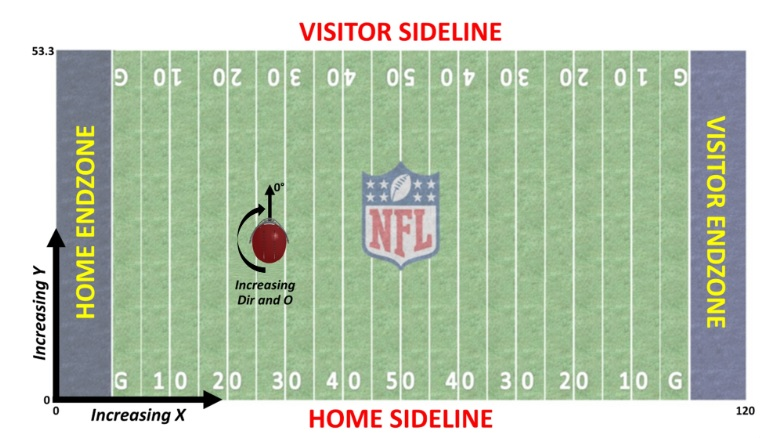

# Importación#

In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"julianolaya","key":"ae2b9b70184725f91892e3ae34eb5edb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle competitions download -c nfl-health-and-safety-helmet-assignment


100% 3.03G/3.03G [00:30<00:00, 116MB/s]
100% 3.03G/3.03G [00:30<00:00, 105MB/s]


In [ ]:
!unzip nfl-health-and-safety-helmet-assignment.zip


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: images/57830_000403_Sideline_frame0871.jpg  
  inflating: images/57830_000734_Endzone_frame60.jpg  
  inflating: images/57830_000734_Sideline_frame0520.jpg  
  inflating: images/57830_000734_Sideline_frame89.jpg  
  inflating: images/57830_000965_Endzone_frame192.jpg  
  inflating: images/57830_000965_Sideline_frame3.jpg  
  inflating: images/57830_001765_Sideline_frame0675.jpg  
  inflating: images/57830_002030_Endzone_frame496.jpg  
  inflating: images/57830_002030_Sideline_frame191.jpg  
  inflating: images/57830_002073_Endzone_frame1065.jpg  
  inflating: images/57830_002900_Endzone_frame166.jpg  
  inflating: images/57830_002900_Sideline_frame174.jpg  
  inflating: images/57830_002944_Endzone_frame0746.jpg  
  inflating: images/57831_000168_Endzone_frame0856.jpg  
  inflating: images/57831_000400_Endzone_frame0693.jpg  
  inflating: images/57831_000530_Endzone_frame47.jpg  
  inflating: images/57831_000530_S

Hasta acá va la importación del dataset directamente desde kaggle

# Exploración del archivo "train_player_tracking.csv"

Para explorar y limpiar el archivo "train_player_tracking.csv", utilizamos la librería Pandas. Primero, importamos el archivo a un DataFrame de Pandas con el siguiente código:

In [ ]:
import pandas as pd

df = pd.read_csv('train_player_tracking.csv')


Veamos las primeras filas del dataframe:

In [ ]:
df.head()

,gameKey,playID,player,time,x,y,s,a,dis,o,dir,event
0,57583,82,H97,2018-09-14T00:23:45.500Z,38.89,28.06,0.0,0.0,0.0,261.28,222.79,NaN
1,57583,82,H97,2018-09-14T00:23:45.599Z,38.89,28.06,0.0,0.0,0.0,261.28,221.93,NaN
2,57583,82,H97,2018-09-14T00:23:45.700Z,38.89,28.06,0.0,0.0,0.0,261.28,221.21,NaN
3,57583,82,H97,2018-09-14T00:23:45.799Z,38.88,28.05,0.0,0.0,0.0,261.28,220.07,NaN
4,57583,82,H97,2018-09-14T00:23:45.900Z,38.88,28.05,0.0,0.0,0.0,261.28,220.31,NaN


ahora vamos a obtener información sobre los tipos de datos y valores nulos de cada columna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333811 entries, 0 to 333810
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   gameKey  333811 non-null  int64  
 1   playID   333811 non-null  int64  
 2   player   333811 non-null  object 
 3   time     333811 non-null  object 
 4   x        333811 non-null  float64
 5   y        333811 non-null  float64
 6   s        333811 non-null  float64
 7   a        333811 non-null  float64
 8   dis      333811 non-null  float64
 9   o        333811 non-null  float64
 10  dir      333811 non-null  float64
 11  event    10120 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 30.6+ MB


En esta ejecusión encontramos lo siguiente:


*   Se listan las 12 columnas del dataset.
*   se encuentran float64(7), int64(2), object(3) y un total de 333811 entradas en cada columna
*   en la columna "event" se obtienen 10120 entradas no nulas, y el resto serian nulas.
*   Las demas columnas poseen entradas no nulas.

Esto nos permite concluir que solo la columna event posee datos incompletos, quizá debido a la naturaleza de las imagenes captadas, que no siempre permiten identificar un evento caracteristico.





Ahora veamos estadisticos de las columnas:

In [ ]:
df.describe()

,gameKey,playID,x,y,s,a,dis,o,dir
count,333811.000000,333811.000000,333811.000000,333811.000000,333811.000000,333811.000000,333811.000000,333811.000000,333811.000000
mean,57847.741150,1873.330319,60.648976,26.403351,0.983751,0.734539,0.101053,181.502301,181.007963
std,171.869352,1292.313699,28.475944,6.593681,1.219968,0.882557,0.122036,99.869961,104.451026
min,57583.000000,82.000000,2.940000,-3.720000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57684.000000,658.000000,37.520000,22.860000,0.110000,0.120000,0.020000,90.150000,91.360000
50%,57905.000000,1741.000000,62.350000,26.220000,0.550000,0.460000,0.060000,183.430000,180.270000
75%,57995.000000,2918.000000,82.570000,29.850000,1.370000,0.970000,0.140000,271.680000,271.590000
max,58107.000000,4362.000000,116.390000,56.840000,9.930000,10.570000,1.720000,360.000000,360.000000


Ahora observemos los valores unicos y la frecuencia con la cual aparecen en cada columna.

In [ ]:
df['gameKey'].value_counts()

57586    15839
57911    14432
57992    13755
57597    11702
57584    10577
57790    10538
57906    10032
57700     9724
57680     9064
58005     8096
58095     7832
57997     7568
57910     7106
57684     7062
57782     6666
57912     6556
57783     6424
57682     6314
57907     6226
57915     6204
57998     6138
58104     6094
58106     6072
58107     6006
57676     5940
57788     5940
57904     5874
57787     5720
58048     5698
57905     5632
57781     5588
57583     5522
57995     5453
58094     5434
58103     5390
57913     5170
57778     5126
57686     5071
57679     5016
57993     4884
57596     4862
58093     4840
57594     4752
58000     4466
58098     4400
57784     4202
58102     3784
57775     3388
57785     3146
57786     2486
Name: gameKey, dtype: int64

In [ ]:
df['playID'].value_counts()

718     10032
1264     9724
4022     7832
2492     7744
3691     7568
1164     7106
1985     7062
301      6974
350      6781
147      6688
600      6666
1325     6556
2839     6490
658      6490
3374     6424
2206     6380
2630     6314
540      6248
3615     6226
3093     6204
336      6177
2181     6138
352      6094
2918     6072
4362     6006
781      5940
3572     5940
1367     5874
3413     5720
86       5698
2404     5632
252      5588
82       5522
109      5453
3494     5390
1242     5212
218      5170
4244     5126
2546     5071
3316     5016
4152     5015
475      4884
2686     4862
1923     4840
923      4752
1934     4576
1306     4466
1193     4400
2674     4400
1741     4202
1254     4114
2792     4048
1612     3982
2798     3784
933      3388
2026     3146
423      2838
3470     2684
2819     2596
3085     2486
Name: playID, dtype: int64

In [ ]:
df['x'].value_counts()

68.33     184
68.36     139
62.31     138
76.77     136
78.23     127
         ... 
3.34        1
5.11        1
3.26        1
115.79      1
114.49      1
Name: x, Length: 11180, dtype: int64

In [ ]:
df['y'].value_counts()

29.13    438
29.87    436
23.84    436
23.96    434
23.78    414
        ... 
51.03      1
50.80      1
47.37      1
47.36      1
48.86      1
Name: y, Length: 5421, dtype: int64

In [ ]:
df['s'].value_counts()

0.00    29852
0.01    11959
0.02     7221
0.03     5575
0.04     4847
        ...  
9.40        1
9.27        1
9.18        1
9.46        1
8.32        1
Name: s, Length: 921, dtype: int64

In [ ]:
df['a'].value_counts()

0.00    27989
0.01    12263
0.02     7824
0.03     6152
0.04     5198
        ...  
7.43        1
6.54        1
6.74        1
7.32        1
6.72        1
Name: a, Length: 753, dtype: int64

In [ ]:
df['dis'].value_counts()

0.01    45492
0.00    36755
0.02    28125
0.03    21999
0.04    16989
        ...  
1.32        1
1.08        1
1.72        1
1.01        1
1.03        1
Name: dis, Length: 106, dtype: int64

In [ ]:
df['o'].value_counts()

90.00     205
271.87     98
87.51      72
220.54     70
272.32     68
         ... 
339.25      1
197.99      1
329.91      1
343.62      1
182.08      1
Name: o, Length: 35838, dtype: int64

In [ ]:
df['dir'].value_counts()

0.00      954
180.00     95
90.00      60
270.00     58
45.00      49
         ... 
214.47      1
323.90      1
45.13       1
60.48       1
21.54       1
Name: dir, Length: 35997, dtype: int64

In [ ]:
df['time'].value_counts()

2018-09-14T00:23:45.500Z    22
2019-09-08T21:17:51.700Z    22
2019-09-08T21:17:50.500Z    22
2019-09-08T21:17:50.599Z    22
2019-09-08T21:17:50.700Z    22
                            ..
2019-10-18T00:32:34.200Z    18
2019-10-18T00:32:34.400Z    18
2019-10-18T00:32:34.299Z    18
2019-10-18T00:32:34.500Z    17
2018-10-29T02:22:44.099Z    11
Name: time, Length: 15180, dtype: int64

In [ ]:
df['event'].value_counts()

line_set                2574
ball_snap               1320
handoff                 1232
tackle                  1210
first_contact           1166
huddle_break_offense    1122
huddle_start_offense     616
man_in_motion            440
shift                     66
out_of_bounds             66
pass_forward              44
pass_arrived              44
pass_outcome_caught       44
run                       44
play_action               44
touchdown                 44
penalty_flag              44
Name: event, dtype: int64

en este caso usamos "df['columna'].value_counts()" donde la funcion .value_counts() se le aplica a cada columna y este arroja un contador a cada valor que ocurre dentro de la columna.

En este caso es de utilidad, pues puede arrojar patrones que pueden ser observados de manera intuitiva y a la vez, como es el caso de "event" permite observar que es una columna con demasiadas entradas nulas, sin embargo, es la unica columna que presenta este comportamiento.

Ahora exploremos variables nulas:

In [ ]:
k = df.isna().sum()
k[k!=0]

event    323691
dtype: int64

Esto nos permite confirmar, que sólo la columna "event", es la única que posee valores nulos

# Limpieza#

Para esto, debemos crear una copia de respaldo en Collab; usaremos el siguiente código para guardar una copia del DataFrame en formato CSV en Google Drive:

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

df.to_csv('/content/drive/MyDrive/train_player_tracking_backup.csv', index=False)


Mounted at /content/drive


Esto permitió que se creara una copia del dataset original, ello con el fin de tener una copia de respaldo por si se llegase a modificar el dataset de manera no deseada, y a la vez, fuese dificil o imposible revertir los cambios.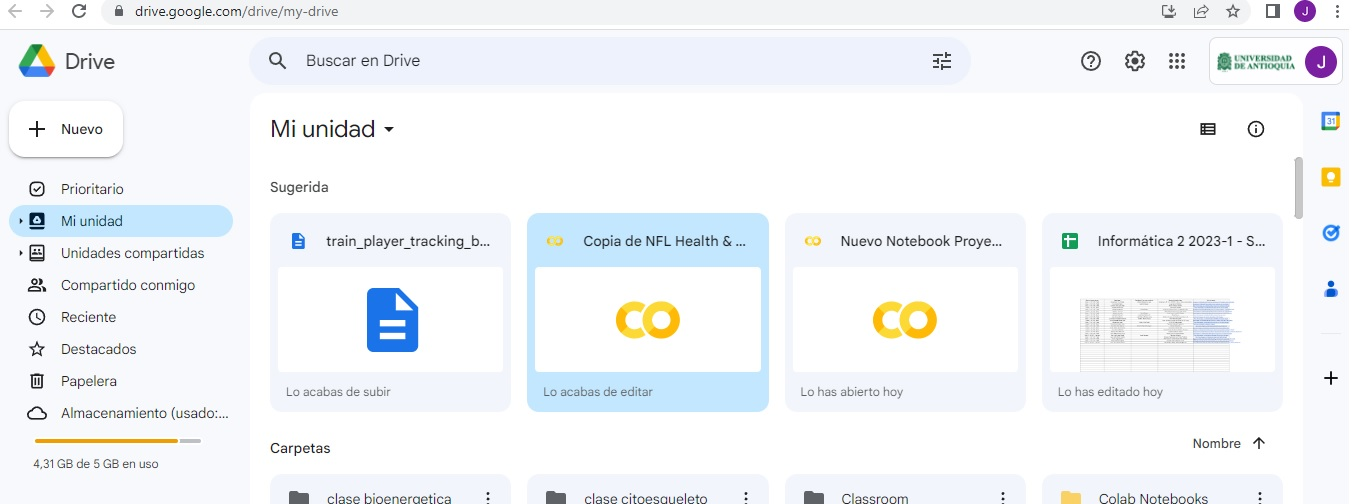

Acá añadimos un pantallazo, donde se aprecia la copia del dataset

Decidimos rellenar los datos faltantes con '0', ya que consideramos que el dataset, posee esta columna por razones adecuadas, ya que la petición de la competición, pide reconocimiento de patrones de los cascos de los jugadores, y esta información puede llegar a aser util en ciertos analisis de las imagenes aportadas por la competición.

Acá con la función "df.fillna(0, inplace=True)" ponemos "0" donde se reconozca un valor NAN.

In [ ]:
df.fillna(0, inplace=True)

Volvemos a imprimir las primeras filas para comprobar como ha cambiado el dataset

In [ ]:
df.head()

,gameKey,playID,player,time,x,y,s,a,dis,o,dir,event
0,57583,82,H97,2018-09-14T00:23:45.500Z,38.89,28.06,0.0,0.0,0.0,261.28,222.79,0
1,57583,82,H97,2018-09-14T00:23:45.599Z,38.89,28.06,0.0,0.0,0.0,261.28,221.93,0
2,57583,82,H97,2018-09-14T00:23:45.700Z,38.89,28.06,0.0,0.0,0.0,261.28,221.21,0
3,57583,82,H97,2018-09-14T00:23:45.799Z,38.88,28.05,0.0,0.0,0.0,261.28,220.07,0
4,57583,82,H97,2018-09-14T00:23:45.900Z,38.88,28.05,0.0,0.0,0.0,261.28,220.31,0


Ahora, si quisieremos rellenar cada valor nulo con el promedio, hariamos lo siguiente:

In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-27-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Acá podemos agregar el promedio en vez de cero, similar a la instrucción anterior.

In [ ]:
df.head()

,gameKey,playID,player,time,x,y,s,a,dis,o,dir,event
0,57583,82,H97,2018-09-14T00:23:45.500Z,38.89,28.06,0.0,0.0,0.0,261.28,222.79,0
1,57583,82,H97,2018-09-14T00:23:45.599Z,38.89,28.06,0.0,0.0,0.0,261.28,221.93,0
2,57583,82,H97,2018-09-14T00:23:45.700Z,38.89,28.06,0.0,0.0,0.0,261.28,221.21,0
3,57583,82,H97,2018-09-14T00:23:45.799Z,38.88,28.05,0.0,0.0,0.0,261.28,220.07,0
4,57583,82,H97,2018-09-14T00:23:45.900Z,38.88,28.05,0.0,0.0,0.0,261.28,220.31,0


Ahora como sería la función para eliminar esta columna si asi lo deseamos:

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,gameKey,playID,player,time,x,y,s,a,dis,o,dir,event
0,57583,82,H97,2018-09-14T00:23:45.500Z,38.89,28.06,0.0,0.0,0.0,261.28,222.79,0
1,57583,82,H97,2018-09-14T00:23:45.599Z,38.89,28.06,0.0,0.0,0.0,261.28,221.93,0
2,57583,82,H97,2018-09-14T00:23:45.700Z,38.89,28.06,0.0,0.0,0.0,261.28,221.21,0
3,57583,82,H97,2018-09-14T00:23:45.799Z,38.88,28.05,0.0,0.0,0.0,261.28,220.07,0
4,57583,82,H97,2018-09-14T00:23:45.900Z,38.88,28.05,0.0,0.0,0.0,261.28,220.31,0


Nota: estas funciones no funcionaron, ya que al cambiar los valores nulos por 0, ya las funciones no eran procedentes, pues no existen en estos momentos valores nulos, sino que existen valores con '0' en estas posiciones donde habian valores NAN.

# División de datos#


se dividen los datos en dos grupos:

Como ya hemos modificado el dataframe del dataset, volvemos a leerlo con la siguiente instrucción:

In [ ]:
df = pd.read_csv('train_player_tracking.csv')

Ahora dividiremos el dataset en dos grupos

In [ ]:
grupo_a = df.iloc[:355]  # Primeros 355 registros 

## sabemos que existen 333811 entradas en el dataset, pero si queremos los ultimos 355
## debemos hacer una resta simple: 333811 - 355 = 333456
grupo_b = df.iloc[333456:]  # Últimos 355 registros

Ahora guardaremos estos grupos en archivos separados:

In [ ]:
grupo_a.to_csv('grupo_a.csv', index=False)
grupo_b.to_csv('grupo_b.csv', index=False)


Acá se puede observar como se guardan los archivos en la carpeta de archivos del collab.

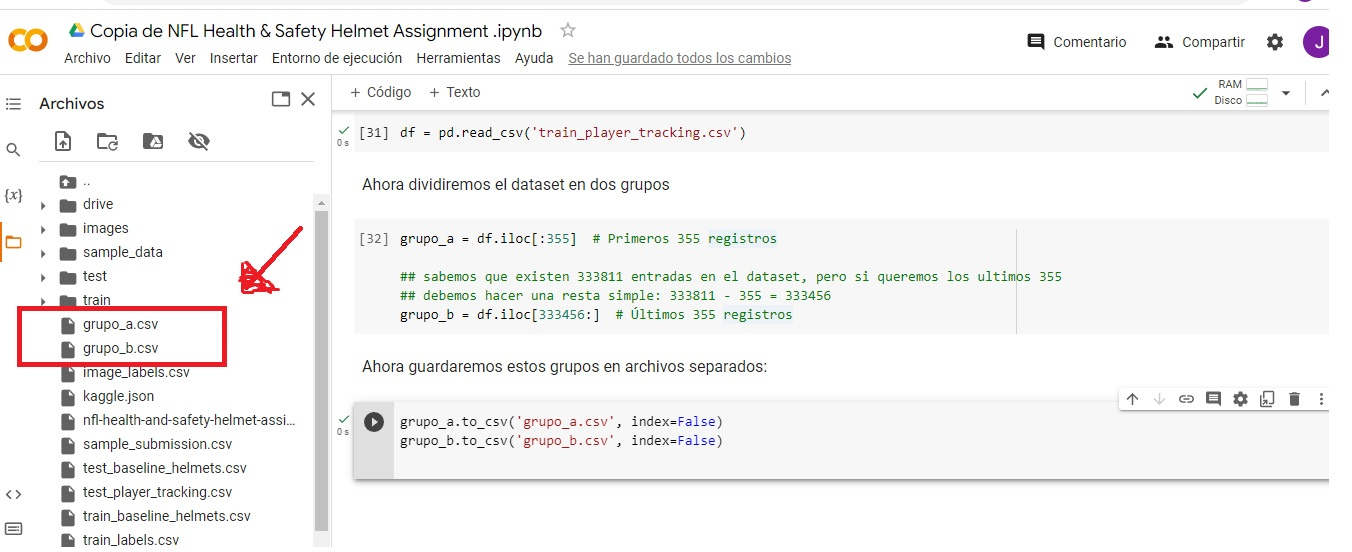

# Exploración de los grupos A y B#

Volvamos a cargar el archivo original a modo de archivo limpio u original.


In [ ]:
# Cargar el archivo limpio
df_clean = pd.read_csv('train_player_tracking.csv')

Seleccionar las columnas a analizar:
En este caso, se seleccionarán las columnas 'player', 's' y 'event'. La columna 'player' es categórica y las columnas 's' y 'event' son numéricas.

In [ ]:
# Seleccionar las columnas a analizar
columns = ['player', 's', 'event']

Dividir el conjunto de datos en dos grupos:
Para dividir el conjunto de datos en dos grupos, se puede utilizar el método de indexación de Pandas.

In [ ]:
# Dividir el conjunto de datos en dos grupos
group_a = df_clean.iloc[:355]
group_b = df_clean.iloc[-333456:]

Calcular medidas de tendencia central para columnas numéricas:
Para las columnas numéricas 's', se pueden calcular la media, moda y mediana utilizando los métodos de Pandas 'mean()', 'mode()' y 'median()', respectivamente.

In [ ]:
# Calcular medidas de tendencia central para columnas numéricas
for col in ['s']:
    print(f"\n{col.capitalize()}:")
    print(f"  Media - Grupo A: {group_a[col].mean():.2f}, Grupo B: {group_b[col].mean():.2f}")
    print(f"  Moda - Grupo A: {group_a[col].mode()[0]:.2f}, Grupo B: {group_b[col].mode()[0]:.2f}")
    print(f"  Mediana - Grupo A: {group_a[col].median():.2f}, Grupo B: {group_b[col].median():.2f}")


S:
  Media - Grupo A: 0.76, Grupo B: 0.98
  Moda - Grupo A: 0.00, Grupo B: 0.00
  Mediana - Grupo A: 0.46, Grupo B: 0.55


Calcular porcentajes de incidencia para columnas categóricas:
Para la columna categórica 'event', se pueden calcular los porcentajes de incidencia de cada opción utilizando el método de Pandas 'value_counts(normalize=True)'.

In [ ]:
# Calcular porcentajes de incidencia para columnas categóricas
for col in ['event']:
    print(f"\n{col.capitalize()}:")
    print("  Grupo A:")
    print(group_a[col].value_counts(normalize=True))
    print("  Grupo B:")
    print(group_b[col].value_counts(normalize=True))


Event:
  Grupo A:
line_set                0.4
huddle_break_offense    0.2
man_in_motion           0.1
ball_snap               0.1
handoff                 0.1
tackle                  0.1
Name: event, dtype: float64
  Grupo B:
line_set                0.254204
ball_snap               0.130465
handoff                 0.121761
tackle                  0.119585
first_contact           0.115331
huddle_break_offense    0.110781
huddle_start_offense    0.060930
man_in_motion           0.043422
shift                   0.006528
out_of_bounds           0.006528
pass_forward            0.004352
pass_arrived            0.004352
pass_outcome_caught     0.004352
run                     0.004352
play_action             0.004352
touchdown               0.004352
penalty_flag            0.004352
Name: event, dtype: float64


Analisis de las diferencias entre los dos grupos.

Primero analisemos los eventos o las columnas categoricas:

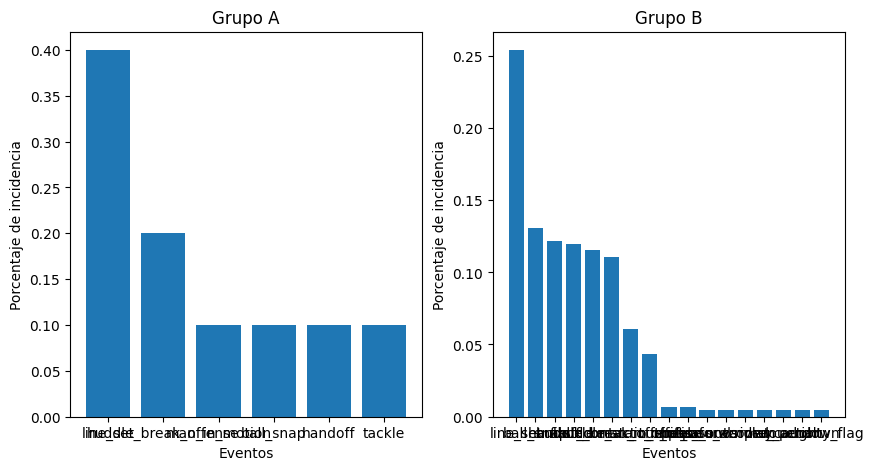

In [ ]:
import matplotlib.pyplot as plt

# Graficar los porcentajes de incidencia de la columna 'event'
events_a = group_a['event'].value_counts(normalize=True)
events_b = group_b['event'].value_counts(normalize=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(events_a.index, events_a.values)
ax[0].set_title('Grupo A')
ax[0].set_xlabel('Eventos')
ax[0].set_ylabel('Porcentaje de incidencia')
ax[1].bar(events_b.index, events_b.values)
ax[1].set_title('Grupo B')
ax[1].set_xlabel('Eventos')
ax[1].set_ylabel('Porcentaje de incidencia')
plt.show()


Aca podemos observar que en el grupo A, solo se generan la presencia de 6 eventos categoricos, mientras que en el grupo B se generan 17 eventos categoricos, sin embargo, el grupo A presenta una mayor incidencia o porcentaje de incidencia.

Esto nos permite inferir que no se presentan iguales porcentajes de incidenci, ya que los grupos precisamente se diferencian en las categorias de eventos ocurridos. por ello no se puede calcular un procentaje de error para estos dos grupos.

Luego, para las medidas de tendencia central , los dos grupos se encuentran demasiado alejadas a excepción de la moda, pues en este caso, el datos 0,0 se presentaba con mayor medida en ambos grupos.

# Conversión a vertor de columna numerica#


Para convertir una columna numérica de uno de los grupos en un vector de datos, se puede utilizar la librería NumPy. Primero, se debe cargar el dataset en un DataFrame de Pandas y luego seleccionar la columna deseada. Luego, se puede convertir esa columna en un vector de datos utilizando la función to_numpy() de Pandas.

In [ ]:
import numpy as np

# Cargar dataset en un DataFrame
df = pd.read_csv("grupo_a.csv")

# Seleccionar columna numérica
columna_numerica = df["s"]

# Convertir columna en un vector de datos
vector_datos = columna_numerica.to_numpy()

In [ ]:
# Guardar vector en un archivo .npy
np.save('vector_datos.npy', vector_datos)

se carga el archivo "grupo_a.csv" en un DataFrame de Pandas y se selecciona la columna "s" que contiene datos numéricos. Luego, se convierte la columna en un vector de datos utilizando la función to_numpy() de Pandas.

# Contaminación de datos#

Para generar los dos nuevos sets de datos a partir de la contaminación cruzada entre el set de datos proporcionado en grupo_a.csv y el obtenido en vector_datos.npy,  utilizamos los siguientes códigos

In [ ]:
# Cargar dataset en un DataFrame
df1 = pd.read_csv("grupo_a.csv")

# Cargar vector de datos
vector_datos = np.load("vector_datos.npy")

# Generar sets de datos por suma y multiplicación punto a punto
set_suma = df1["s"].to_numpy() + vector_datos
set_multiplicacion = df1["s"].to_numpy() * vector_datos

# Guardar sets de datos en archivos .npy
np.save("set_suma.npy", set_suma)
np.save("set_multiplicacion.npy", set_multiplicacion)

# Imprimir nuevo set de datos generado por suma punto a punto
print("Suma punto a punto:")
print(set_suma)

# Imprimir nuevo set de datos generado por multiplicación punto a punto
print("multiplicación punto a punto:")
print(set_multiplicacion)

Suma punto a punto:
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.02 0.1  0.26 0.46 0.64 0.82 0.96 1.12 1.28 1.34 1.4
 1.48 1.5  1.62 1.74 1.94 2.12 2.28 2.44 2.56 2.74 2.84 2.86 2.88 2.84
 2.72 2.58 2.42 2.24 2.1  1.94 1.78 1.7  1.58 1.44 1.32 1.12 0.94 0.74
 0.52 0.4  0.4  0.46 0.54 0.62 0.62 0.46 0.42 0.36 0.32 0.34 0.42 0.46
 0.46 0.44 0.34 0.24 0.16 0.06 0.06 0.08 0.16 0.18 0.22 0.24 0.26 0.28
 0.24 0.22 0.18 0.18 0.16 0.12 0.1  0.08 0.08 0.08 0.06 0.04 0.04 0.04
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.16 0.54 1.02 1.52
 1.88 2.08 2.16 2.16 2.06 1.84 1.6  1.32 1.12 1.14 1.4  1.8  2.42 2.94
 3.42 4.02 4.58 5.1  5.58 6.04 6.58 6.96 7.52 7.72 8.02 8.26 8.56 8.74
 8.88 9.06 9.1  9.06 8.94 8.72 8.38 7.9  7.36 6.76 6.1  5.42 4.68 

primero se carga el archivo CSV con el dataset del grupo A en un DataFrame de pandas. Luego se carga el archivo .npy con el vector de datos generado en el paso anterior.

Después se generan dos nuevos sets de datos: uno por suma punto a punto entre la columna numérica del dataset del grupo A y el vector de datos, y otro por multiplicación punto a punto. Ambos sets de datos se guardan en archivos .npy con los nombres "set_suma.npy" y "set_multiplicacion.npy", respectivamente.

#Filtrado#

Ahora haremos el filtrado de datos:

Para aplicar la función por tramos a la señal contaminada por multiplicación, primero necesitamos encontrar el valor máximo y mínimo de la señal. Luego, podemos usar un bucle for para aplicar la función por tramos a cada punto de la señal. Finalmente, podemos graficar la señal original y la señal filtrada usando la biblioteca matplotlib.

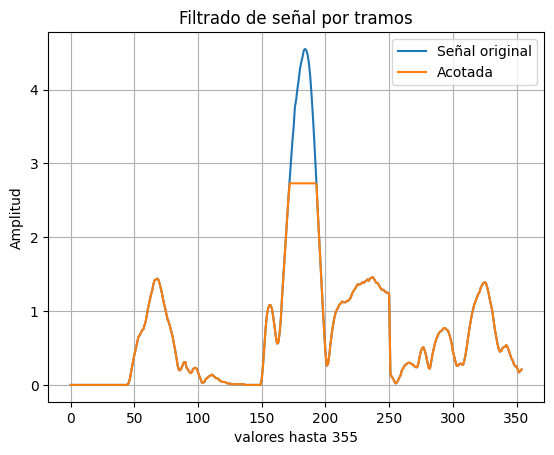

In [ ]:
import matplotlib.pyplot as plt

# Cargar vector de datos
vector_datos = np.load("vector_datos.npy")

# Encontrar valor máximo y mínimo de la señal
val_max = np.max(vector_datos)
val_min = np.min(vector_datos)

# Aplicar función por tramos a cada punto de la señal
vector_filtrado = np.zeros_like(vector_datos)
for i in range(len(vector_datos)):
    if vector_datos[i] >= val_max*0.60:
        vector_filtrado[i] = val_max*0.60
    elif vector_datos[i] > val_min*0.75 and vector_datos[i] < val_max*0.60:
        vector_filtrado[i] = vector_datos[i]
    else:
        vector_filtrado[i] = val_min

# Graficar señal original y señal filtrada
fig, ax = plt.subplots()
ax.plot(vector_datos, label="Señal original")
ax.plot(vector_filtrado, label="Acotada")
ax.set_xlabel("valores hasta 355")
ax.set_ylabel("Amplitud")
ax.set_title("Filtrado de señal por tramos")
ax.legend()
ax.grid()
plt.show()


# Digitalización#
Ahora haremos la digitalización de la señal:

Para digitalizar la señal, se puede utilizar el umbral obtenido en el paso anterior y una comparación para determinar si cada punto de la señal está por encima o por debajo del umbral. Se puede usar la función np.where() de NumPy para realizar esta comparación.



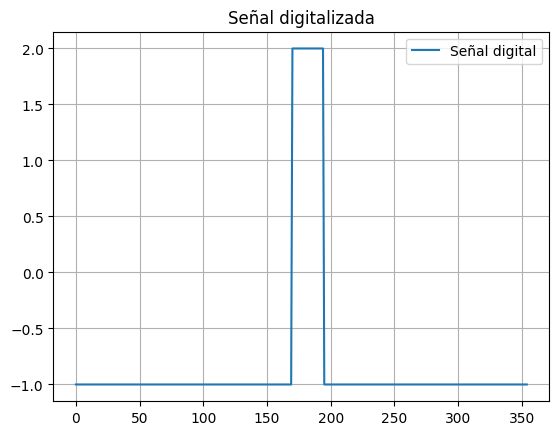

In [ ]:
# Cargar el vector de datos
vector_datos = np.load("vector_datos.npy")

# Encontrar el umbral
umbral = (np.max(vector_datos) + np.min(vector_datos)) / 2

# Digitalizar la señal
señal_digital = np.where(vector_datos > umbral, 2, -1)

# Graficar la señal digital
plt.plot(señal_digital, label="Señal digital")
plt.legend()
plt.grid(True)
plt.title("Señal digitalizada")
plt.show()